### Simple Linear Regression using StatsModel

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv(r'Simple linear regression.csv')
data.head()

In [ ]:
data

In [ ]:
data.describe()

In [ ]:
y = data['GPA']
x1 = data['SAT']


In [ ]:
plt.scatter(x1,y)
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

In [ ]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

In [ ]:
plt.scatter(x1,y)
yhat = 0.0017*x1 + 0.275
fig = plt.plot(x1,yhat, lw=4, c='orange', label='regression line')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

# Linear Regression with sklearn

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv(r'Simple linear regression.csv')
data.head()

In [ ]:
x = data['SAT']
y = data['GPA']

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(x_matrix,y)
#x must be input and y must be target value

In [ ]:
reg.score(x_matrix,y)
# it returns R squared value

In [ ]:
reg.coef_
# cofficients

In [ ]:
reg.intercept_
# intercept

In [ ]:
# make prediction
new_data = pd.DataFrame(data=[1400,1700],columns=['SAT'])
new_data
reg.predict(new_data)


In [ ]:
new_data = reg.predict(new_data)
new_data

In [ ]:
plt.scatter(x_matrix,y)
yhat = reg.coef_*x_matrix + reg.intercept_
fig = plt.plot(x_matrix,yhat, lw=4, c='orange', label='regression line')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

# Multiple Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('Multiple linear regression.csv')
data.head()

In [ ]:
data.describe()

In [ ]:
x = data[['SAT','Rand 1,2,3']]
y = data['GPA']

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(x,y)
# we dont need to reshape the data

In [ ]:
reg.coef_

In [ ]:
reg.intercept_

In [ ]:
# rquared value
reg.score(x,y)

### formula for adjusted r^2

#### $R^2_(adj) = 1- (1-R^2)*\frac(n-1)(n-p-1)$

In [ ]:
x.shape

In [ ]:
r2 = reg.score(x,y)

n = x.shape[0]

p = x.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

adjusted_r2

## Feature Selection

In [ ]:
from sklearn.feature_selection import f_regression
f_regression(x,y)

In [ ]:
p_values = f_regression(x,y)[1]
p_values
# becaure p-values are at 1 index

In [ ]:
p_values.round(3)
#SAT is useful variable  while round 1,2,3 is useless

## Creating summary table

In [ ]:
reg_summary = pd.DataFrame(data = x.columns.values,columns=['feature'])
reg_summary

In [ ]:
reg_summary['coefficient'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)
reg_summary

In [ ]:
# we can ignore the Rand 1,2,3 beacause its p-value > 0.5

## Standartization or Feature scaling
### It is the process of transforming data into a scale

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('Multiple linear regression.csv')
data.head()

In [ ]:
x = data[['SAT','Rand 1,2,3']]
y = data['GPA']

In [ ]:
# Standartizing the data
from sklearn.preprocessing import StandardScaler 

In [ ]:
scaler  = StandardScaler()

In [ ]:
scaler.fit(x)

In [ ]:
x_scaled = scaler.transform(x)

In [ ]:
x_scaled

In [ ]:
# now  create the linear regression by standartize values
reg = LinearRegression()
reg.fit(x_scaled,y)

In [ ]:
reg.coef_

In [ ]:
reg.intercept_


In [ ]:
# creating a summary table 
reg_summary = pd.DataFrame([['Bias'],['SAT'],['Rand 1,2,3']],columns=['Features'])
reg_summary['Weights'] = reg.intercept_ , reg.coef_[0], reg.coef_[1]

In [ ]:
reg_summary
#Bias is Intercept in ML
# the closer the weight to 0, the lesser the impact the bigger the weight the bigger the impact

## Making prediction with the standardized coefficients (Weights)

In [ ]:
new_data = pd.DataFrame([[1700,2],[1800,1]],columns=['SAT','Rand 1,2,3'])
new_data

In [ ]:
reg.predict(new_data)
# this is because we have scaled data in training so now train our new value

In [ ]:
new_data_scale = scaler.transform(new_data)
new_data_scale

In [ ]:
reg.predict(new_data_scale)

### What if we removed the 'Random 1,2,3' variable?

In [ ]:
reg_simple = LinearRegression()
x_simple_matrix = x_scaled[:,0].reshape(-1,1) #[:,0] is use beacuse we are taking only first column of matrix
reg_simple.fit(x_simple_matrix,y)

In [ ]:
reg_simple.predict(new_data_scale[:,0].reshape(-1,1))
#we got the same results as above

## Train test split


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
a = np.arange(0,101)
b = np.arange(500,601)

In [ ]:
a

In [ ]:
b

In [ ]:
train_test_split(a)

In [ ]:
a_train,a_test = train_test_split(a, test_size=0.2, shuffle = False)

In [ ]:
a_train.shape , a_test.shape 

In [ ]:
a_test

In [ ]:
a_train,a_test,b_train,b_test = train_test_split(a,b, test_size=0.2, shuffle = True)
#shuffling pattern will be same

In [ ]:
b_train.shape , b_test.shape

In [ ]:
b_train

In [ ]:
a_train

## Practical Example

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [8]:
raw_data = pd.read_csv(r'Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [34]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [10]:
# Determing the varible of intrest
data = raw_data.drop(['Model'],axis=1) # axis = 1 for columns and axis = 0 for raws 
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [11]:
# Dealing with missing values
data.isnull()
# 1= true and 0 = false

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [13]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

#### Rule of Thumb - if you are removing <5% of the observations, you are free to just remove all that have missing values

In [16]:
data_no_nv = data.dropna(axis=0)

In [18]:
data_no_nv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


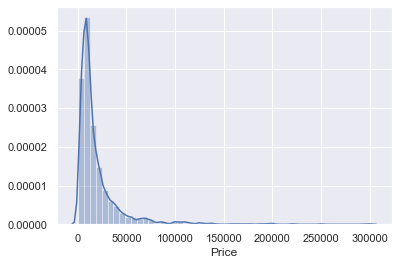

In [19]:
# Exploring the pdfs
sns.distplot(data_no_nv['Price'])

In [20]:
# Dealing with outliers
q = data_no_nv['Price'].quantile(0.99)
data_1 = data_no_nv[data_no_nv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


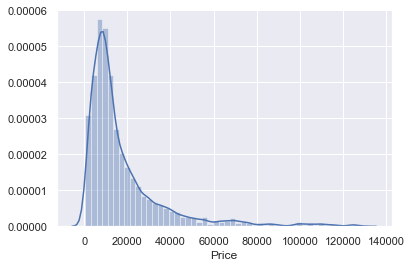

In [21]:
sns.distplot(data_1['Price'])

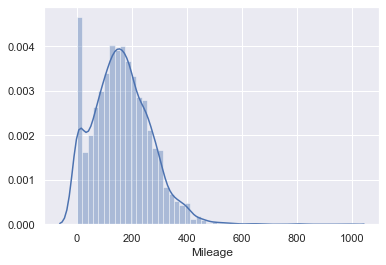

In [23]:
sns.distplot(data_no_nv['Mileage'])

In [26]:
q = data_no_nv['Mileage'].quantile(0.99)
data_2 = data_no_nv[data_no_nv['Mileage']<q]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1516,NaN,NaN,1833,3616,NaN
mean,NaN,19668.596878,NaN,159.892570,2.768489,NaN,NaN,2006.479669
std,NaN,25893.860852,NaN,96.633975,4.960538,NaN,NaN,6.616733
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21962.250000,NaN,227.000000,3.000000,NaN,NaN,2012.000000


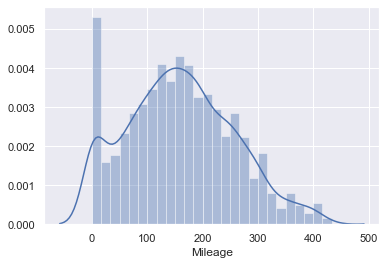

In [27]:
sns.distplot(data_2['Mileage'])

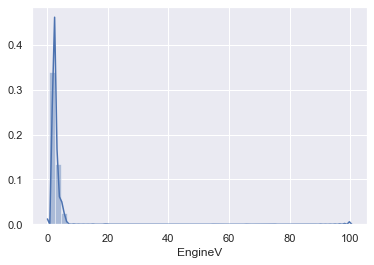

In [28]:
sns.distplot(data_no_nv['EngineV'])

In [31]:
data_3 = data_no_nv[data_no_nv['EngineV']<6.5]
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4002,4002.000000,4002,4002.000000,4002.000000,4002,4002,4002.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,875,NaN,1522,NaN,NaN,1854,3637,NaN
mean,NaN,19615.045967,NaN,163.384058,2.466724,NaN,NaN,2006.395302
std,NaN,25870.138722,NaN,103.476924,0.973586,NaN,NaN,6.696077
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


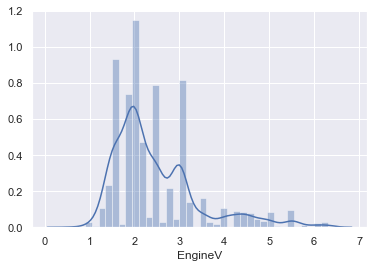

In [32]:
sns.distplot(data_3['EngineV'])

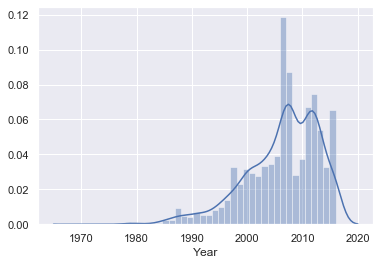

In [35]:
sns.distplot(data_no_nv['Year'])

In [38]:
q = data_no_nv['Year'].quantile(0.01)
data_4 = data_no_nv[data_no_nv['Year']>q]
data_4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3969,3969.000000,3969,3969.000000,3969.000000,3969,3969,3969.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,866,NaN,1500,NaN,NaN,1850,3598,NaN
mean,NaN,19782.123988,NaN,162.738221,2.776105,NaN,NaN,2006.687831
std,NaN,25918.538393,NaN,102.930235,4.969395,NaN,NaN,6.202932
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7170.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,22000.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


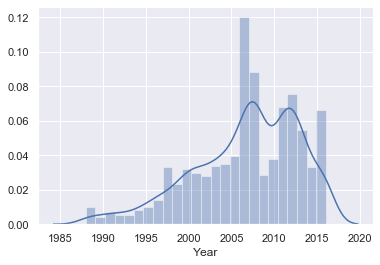

In [39]:
sns.distplot(data_4['Year'])

In [40]:
data_cleaned = data_4.reset_index(drop=True) 

In [41]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3969,3969.000000,3969,3969.000000,3969.000000,3969,3969,3969.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,866,NaN,1500,NaN,NaN,1850,3598,NaN
mean,NaN,19782.123988,NaN,162.738221,2.776105,NaN,NaN,2006.687831
std,NaN,25918.538393,NaN,102.930235,4.969395,NaN,NaN,6.202932
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7170.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,22000.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Checking the OLS assumptions

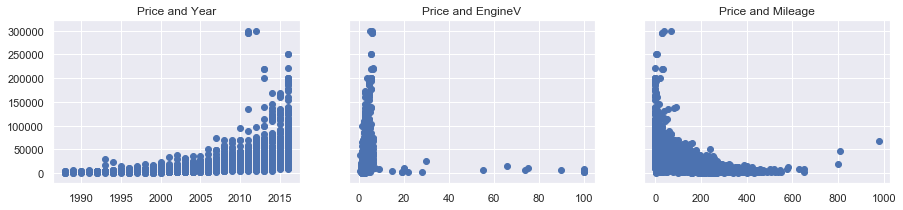

In [44]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

In [46]:
# Relaxing the assumptions
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price 
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3964,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3965,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3966,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3967,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


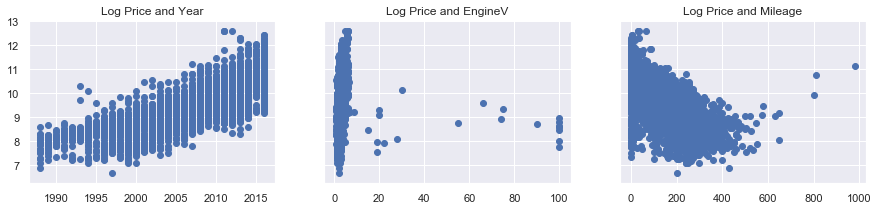

In [47]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

In [49]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

In [51]:
# Multicollinearity
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i)for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [53]:
vif

,VIF,features
0,3.479078,Mileage
1,3.741510,Year
2,1.312987,EngineV


In [54]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

##### VIF = 1 :No Multicollinearity
##### 1 < VIF < 5 : Perfectly Okay
##### 10 < VIF : unacceptalbe

### Create Dummy Variables:

In [55]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity,drop_first=True)

In [56]:
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3964,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3965,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3966,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3967,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [57]:
#Rearrange a bit
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [58]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [59]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [60]:
### LINEAR REGRESSION MODEL
# Declare the inputs and targets 
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

In [62]:
#Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [68]:
inputs_scaled = scaler.transform(inputs)

In [69]:
# train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(inputs_scaled,targets, test_size=0.2, random_state=365)

In [70]:
# Create the Regression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
y_hat = reg.predict(x_train)

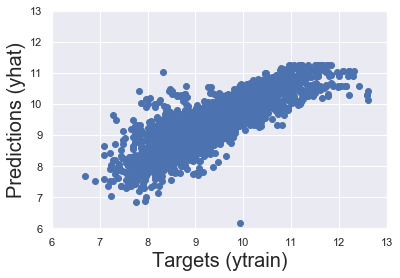

In [72]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (ytrain)',fontsize=20)
plt.ylabel('Predictions (yhat)',fontsize=20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

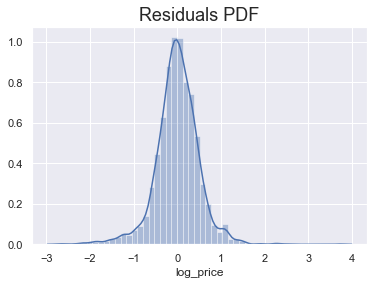

In [73]:
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF', size=18)

In [74]:
reg.score(x_train,y_train)

0.7064135464223733

In [75]:
#    Finding the weights and bias
reg.coef_


array([-0.46959176,  0.01517737,  0.02754735,  0.07350003, -0.17354107,
       -0.22251973, -0.06642924, -0.12859576, -0.22907017, -0.13916077,
       -0.29805079, -0.18606218, -0.2467679 , -0.10079439, -0.02888017,
       -0.10705484,  0.3220981 ])

In [76]:
reg.intercept_


9.429935379112756

In [77]:
reg_summary = pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.469592
1,EngineV,0.015177
2,Brand_BMW,0.027547
3,Brand_Mercedes-Benz,0.073500
4,Brand_Mitsubishi,-0.173541
5,Brand_Renault,-0.222520
6,Brand_Toyota,-0.066429
7,Brand_Volkswagen,-0.128596
8,Body_hatch,-0.229070
9,Body_other,-0.139161


In [78]:
data_cleaned["Brand"].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [79]:
#####################     TESTING 
y_hat_test = reg.predict(x_test)

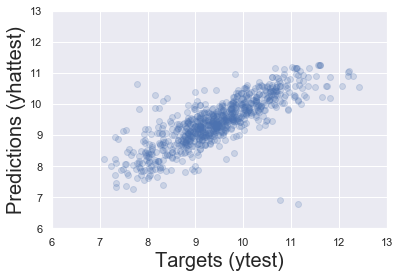

In [81]:
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.xlabel('Targets (ytest)',fontsize=20)
plt.ylabel('Predictions (yhattest)',fontsize=20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [82]:
df_pf = pd.DataFrame(np.exp(y_hat_test),columns = ['Predictions'])
df_pf.head()

,Predictions
0,7667.516073
1,3561.417082
2,12590.712853
3,6139.080855
4,26309.107374


In [83]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Predictions,Target
0,7667.516073,NaN
1,3561.417082,7900.0
2,12590.712853,NaN
3,6139.080855,NaN
4,26309.107374,NaN


In [84]:
y_test

166      9.220291
3465     8.216088
475      9.472705
3803     9.200290
2695    10.264652
          ...    
2450     7.575585
2889     9.384294
876      9.615739
3047     9.104869
2600     8.433594
Name: log_price, Length: 794, dtype: float64

In [85]:
y_test = y_test.reset_index(drop=True)
y_test

0       9.220291
1       8.216088
2       9.472705
3       9.200290
4      10.264652
         ...    
789     7.575585
790     9.384294
791     9.615739
792     9.104869
793     8.433594
Name: log_price, Length: 794, dtype: float64

In [86]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Predictions,Target
0,7667.516073,10100.0
1,3561.417082,3700.0
2,12590.712853,13000.0
3,6139.080855,9900.0
4,26309.107374,28700.0


In [87]:
df_pf['Residuals'] = df_pf['Target'] - df_pf['Predictions']

In [89]:
df_pf['Difference%'] = np.absolute(df_pf['Residuals']/df_pf['Target']*100)
df_pf

,Predictions,Target,Residuals,Difference%
0,7667.516073,10100.0,2432.483927,24.083999
1,3561.417082,3700.0,138.582918,3.745484
2,12590.712853,13000.0,409.287147,3.148363
3,6139.080855,9900.0,3760.919145,37.989082
4,26309.107374,28700.0,2390.892626,8.330636
...,...,...,...,...
789,4767.378808,1950.0,-2817.378808,144.480965
790,8438.560083,11900.0,3461.439917,29.087730
791,16022.491783,14999.0,-1023.491783,6.823733
792,11049.959603,8999.0,-2050.959603,22.790972


In [90]:
df_pf.describe()

,Predictions,Target,Residuals,Difference%
count,794.000000,794.000000,794.000000,794.000000
mean,16490.066766,19851.744723,3361.677957,44.533467
std,13445.706194,25336.112514,18133.447624,85.206689
min,891.321980,1200.000000,-39887.218259,0.108023
25%,7879.101970,7000.000000,-2530.236498,13.493257
50%,12471.465564,11999.500000,275.048187,26.833364
75%,21110.957272,22675.000000,4126.351582,48.302783
max,78103.110113,250000.000000,211675.008137,1633.352737


In [92]:
df_pf.sort_values(by=['Difference%'])

,Predictions,Target,Residuals,Difference%
668,21523.224908,21500.0,-23.224908,0.108023
74,4293.268872,4299.0,5.731128,0.133313
29,16618.829401,16672.5,53.670599,0.321911
552,7225.391008,7200.0,-25.391008,0.352653
779,11345.502661,11300.0,-45.502661,0.402678
...,...,...,...,...
340,24096.848110,4099.0,-19997.848110,487.871386
55,26592.523355,4500.0,-22092.523355,490.944963
17,19045.289624,2500.0,-16545.289624,661.811585
531,29075.998791,3500.0,-25575.998791,730.742823
